In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

import warnings
warnings.filterwarnings('ignore')

In [3]:
from astropology.distance import bottleneck_distance, wasserstein_distance
from astropology.series import pd_from_distance_matrix
from astropology.series import sparse_matrix_serie


In [50]:
def add_noise(y: np.array, noise_amplitudes: np.array) -> np.array:

    n_points = y.size
    n_entries = noise_amplitudes.size
    
    y_noisy = np.zeros((n_entries, n_points))

    for idx, y_noise in enumerate(y_noisy):
        y_noise[:] = noise_amplitudes[idx] * np.random.randn(n_points) + y

    return y_noisy

In [51]:
n_points = 2000
t = np.linspace(0, 5, n_points)
serie = np.cos(2*np.pi*t) + t
noise_amplitudes = np.logspace(-3, 0, 100)
noisy_series = add_noise(serie, noise_amplitudes)

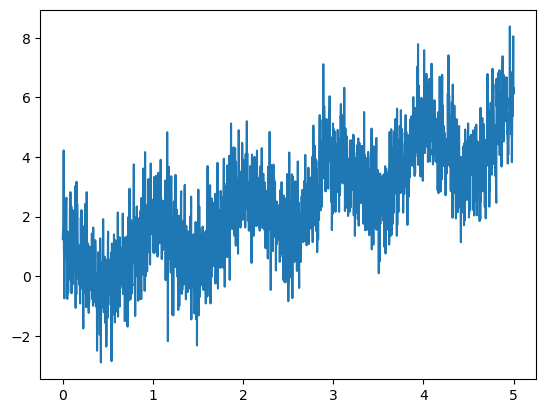

In [52]:
plt.plot(t, noisy_series[-1])

In [53]:
# dm -> distance_matrix
w_distances = []
b_distances = []
pdgms = []
dm_a = sparse_matrix_serie(serie)
pdgm_a = pd_from_distance_matrix(dm_a)
pdgm_a = pdgm_a[np.isfinite(pdgm_a[:, 1]), :]
for noisy_serie in noisy_series:
    dm_b = sparse_matrix_serie(noisy_serie)
    pdgm_b = pd_from_distance_matrix(dm_b)
    pdgm_b = pdgm_b[np.isfinite(pdgm_b[:, 1]), :]
    pdgms.append(pdgm_b)
    w_distances.append(wasserstein_distance(pdgm_a, pdgm_b))
    b_distances.append(bottleneck_distance(pdgm_a, pdgm_b))

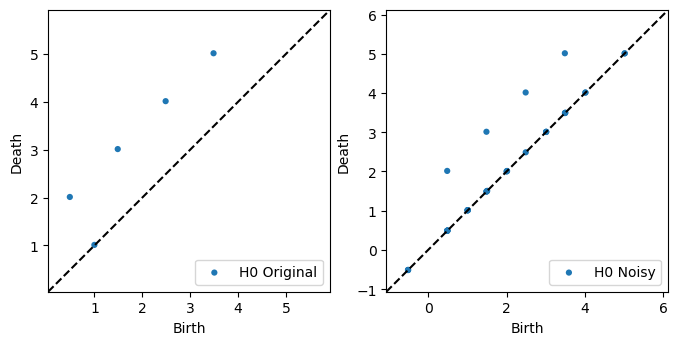

In [60]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_diagrams(pdgm_a, labels = ['H0 Original'])
plt.subplot(122)
plot_diagrams(pdgms[0], labels = ['H0 Noisy'])


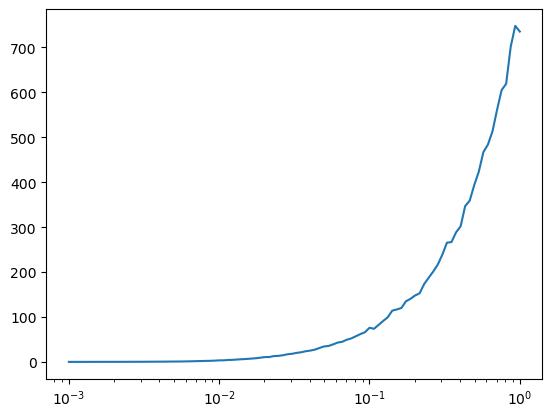

In [61]:
fig, ax = plt.subplots()
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.plot(noise_amplitudes, b_distances)
ax.plot(noise_amplitudes, w_distances)